## Dataset Description: 

The Car Price Dataset contains 10,000 records with 10 attributes detailing used cars and their resale prices. It includes brand, model, year (2000–2023), engine size (1.0L–5.0L), fuel type, transmission, mileage, doors, owner count, and price ($2,000–$18,301). Newer cars, luxury brands, and lower mileage vehicles generally have higher prices. Automatic, diesel, and hybrid cars also tend to be more valuable. The dataset is ideal for price prediction models and market analysis, revealing trends such as depreciation patterns and the rising popularity of hybrid and electric vehicles due to environmental concerns.

Columns in dataset: 

* Brand (object): The car manufacturer (e.g., Kia, Chevrolet, Mercedes, Audi, etc.).
* Model (object): The specific model of the car.
* Year (int64): The manufacturing year of the car (range: 2000 to 2023).
* Engine_Size (float64): The size of the engine in liters (range: 1.0L to 5.0L).
* Fuel_Type (object): The type of fuel used (e.g., Diesel, Hybrid, Electric).
* Transmission (object): The type of transmission (e.g., Manual, Automatic, Semi-Automatic).
* Mileage (int64): The total distance the car has traveled, in kilometers (range: 25 to 299,947).
* Doors (int64): The number of doors (range: 2 to 5).
* Owner_Count (int64): The number of previous owners (range: 1 to 5).
* Price (int64): The selling price of the car in USD (range: $2,000 to $18,301)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
df = pd.read_csv("car_price_dataset.csv")

In [3]:
df

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


In [4]:
df.shape

(10000, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [6]:
df.fillna(0)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


In [7]:
df.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [8]:
df.Price.median()

np.float64(8858.5)

In [9]:
df.Price = df.Price.fillna(df.Price.median())
df

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


In [10]:
Brand=pd.get_dummies(df['Brand'])

In [11]:
print(Brand)

       Audi    BMW  Chevrolet   Ford  Honda  Hyundai    Kia  Mercedes  Toyota  \
0     False  False      False  False  False    False   True     False   False   
1     False  False       True  False  False    False  False     False   False   
2     False  False      False  False  False    False  False      True   False   
3      True  False      False  False  False    False  False     False   False   
4     False  False      False  False  False    False  False     False   False   
...     ...    ...        ...    ...    ...      ...    ...       ...     ...   
9995  False  False      False  False  False    False   True     False   False   
9996  False  False       True  False  False    False  False     False   False   
9997  False   True      False  False  False    False  False     False   False   
9998  False  False      False   True  False    False  False     False   False   
9999  False  False      False  False  False    False  False     False   False   

      Volkswagen  
0       

In [12]:
Model=pd.get_dummies(df['Model'])

In [13]:
print(Model)

      3 Series  5 Series     A3     A4  Accord  C-Class   CR-V  Camry  Civic  \
0        False     False  False  False   False    False  False  False  False   
1        False     False  False  False   False    False  False  False  False   
2        False     False  False  False   False    False  False  False  False   
3        False     False  False  False   False    False  False  False  False   
4        False     False  False  False   False    False  False  False  False   
...        ...       ...    ...    ...     ...      ...    ...    ...    ...   
9995     False     False  False  False   False    False  False  False  False   
9996     False     False  False  False   False    False  False  False  False   
9997      True     False  False  False   False    False  False  False  False   
9998     False     False  False  False   False    False  False  False  False   
9999     False     False  False  False   False    False  False  False  False   

      Corolla  ...  Optima  Passat     

In [14]:
Fuel_Type=pd.get_dummies(df['Fuel_Type'])

In [15]:
print(Fuel_Type)

      Diesel  Electric  Hybrid  Petrol
0       True     False   False   False
1      False     False    True   False
2       True     False   False   False
3      False      True   False   False
4      False     False    True   False
...      ...       ...     ...     ...
9995    True     False   False   False
9996   False      True   False   False
9997   False     False   False    True
9998   False     False    True   False
9999    True     False   False   False

[10000 rows x 4 columns]


In [16]:
Transmission=pd.get_dummies(df['Transmission'])

In [17]:
print(Transmission)

      Automatic  Manual  Semi-Automatic
0         False    True           False
1          True   False           False
2          True   False           False
3         False    True           False
4         False   False            True
...         ...     ...             ...
9995      False   False            True
9996       True   False           False
9997       True   False           False
9998       True   False           False
9999      False    True           False

[10000 rows x 3 columns]


In [18]:
df.drop(['Brand','Model','Fuel_Type','Transmission'],axis=1,inplace=True)

In [19]:
df=pd.concat([df,Brand,Model,Fuel_Type,Transmission],axis=1)

In [20]:
df

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price,Audi,BMW,Chevrolet,Ford,...,Tiguan,Tucson,X5,Diesel,Electric,Hybrid,Petrol,Automatic,Manual,Semi-Automatic
0,2020,4.2,289944,3,5,8501,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,2012,2.0,5356,2,3,12092,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
2,2020,4.2,231440,4,2,11171,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
3,2023,2.0,160971,2,1,11780,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,2003,2.6,286618,3,3,2867,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2004,3.7,5794,2,4,8884,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
9996,2002,1.4,168000,2,1,6240,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
9997,2010,3.0,86664,5,1,9866,False,True,False,False,...,False,False,False,False,False,False,True,True,False,False
9998,2002,1.4,225772,4,1,4084,False,False,False,True,...,False,False,False,False,False,True,False,True,False,False


In [21]:
reg= linear_model.LinearRegression()
reg.fit(df.drop('Price',axis='columns'),df.Price)

LinearRegression()

In [22]:
reg.coef_

array([ 2.98601356e+02,  9.92739311e+02, -1.98902430e-02, -5.50438928e-01,
        3.58752779e-02, -1.11832006e+08,  1.59251096e+07, -2.28200351e+07,
       -1.29365355e+07,  4.29260862e+07,  7.22908421e+07, -3.01308544e+07,
        1.57291712e+07, -3.34629732e+07,  1.40322674e+07, -1.94863447e+06,
       -1.94864153e+06,  1.25808480e+08,  1.25808476e+08, -2.89496074e+07,
       -1.75269412e+06, -2.89496077e+07,  4.74394429e+07, -2.89496003e+07,
        4.74394458e+07, -1.75269690e+06, -5.83143705e+07,  3.67965062e+07,
        2.69130115e+07,  2.69130092e+07,  2.69130124e+07, -1.75268722e+06,
       -5.57942407e+04,  3.67965111e+07,  3.67965091e+07,  4.41073357e+07,
       -5.57934128e+04,  1.25808478e+08,  4.74394538e+07,  4.41073357e+07,
       -5.83143693e+07,  4.41073363e+07, -5.57942572e+04, -5.83143667e+07,
       -1.94862918e+06,  1.33623679e+06,  1.33822471e+06,  1.33722713e+06,
        1.33623794e+06,  1.77265658e+08,  1.77264168e+08,  1.77264166e+08])

In [23]:
reg.intercept_

np.float64(-193169944.1037688)

In [24]:
# Display basic information
print("Dataset Info:")
df.info()
print("\nFirst five rows:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            10000 non-null  int64  
 1   Engine_Size     10000 non-null  float64
 2   Mileage         10000 non-null  int64  
 3   Doors           10000 non-null  int64  
 4   Owner_Count     10000 non-null  int64  
 5   Price           10000 non-null  int64  
 6   Audi            10000 non-null  bool   
 7   BMW             10000 non-null  bool   
 8   Chevrolet       10000 non-null  bool   
 9   Ford            10000 non-null  bool   
 10  Honda           10000 non-null  bool   
 11  Hyundai         10000 non-null  bool   
 12  Kia             10000 non-null  bool   
 13  Mercedes        10000 non-null  bool   
 14  Toyota          10000 non-null  bool   
 15  Volkswagen      10000 non-null  bool   
 16  3 Series        10000 non-null  bool   
 17  5 Series        10

In [25]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
               Year   Engine_Size        Mileage         Doors   Owner_Count  \
count  10000.000000  10000.000000   10000.000000  10000.000000  10000.000000   
mean    2011.543700      3.000560  149239.111800      3.497100      2.991100   
std        6.897699      1.149324   86322.348957      1.110097      1.422682   
min     2000.000000      1.000000      25.000000      2.000000      1.000000   
25%     2006.000000      2.000000   74649.250000      3.000000      2.000000   
50%     2012.000000      3.000000  149587.000000      3.000000      3.000000   
75%     2017.000000      4.000000  223577.500000      4.000000      4.000000   
max     2023.000000      5.000000  299947.000000      5.000000      5.000000   

             Price  
count  10000.00000  
mean    8852.96440  
std     3112.59681  
min     2000.00000  
25%     6646.00000  
50%     8858.50000  
75%    11086.50000  
max    18301.00000  


In [26]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Year              0
Engine_Size       0
Mileage           0
Doors             0
Owner_Count       0
Price             0
Audi              0
BMW               0
Chevrolet         0
Ford              0
Honda             0
Hyundai           0
Kia               0
Mercedes          0
Toyota            0
Volkswagen        0
3 Series          0
5 Series          0
A3                0
A4                0
Accord            0
C-Class           0
CR-V              0
Camry             0
Civic             0
Corolla           0
E-Class           0
Elantra           0
Equinox           0
Explorer          0
Fiesta            0
Focus             0
GLA               0
Golf              0
Impala            0
Malibu            0
Optima            0
Passat            0
Q5                0
RAV4              0
Rio               0
Sonata            0
Sportage          0
Tiguan            0
Tucson            0
X5                0
Diesel            0
Electric          0
Hybrid            0
Pet

In [27]:
# Correlation matrix
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                    Year  Engine_Size   Mileage     Doors  Owner_Count  \
Year            1.000000    -0.001306 -0.002476  0.014867     0.000116   
Engine_Size    -0.001306     1.000000  0.015135 -0.009844     0.007122   
Mileage        -0.002476     0.015135  1.000000  0.007879     0.006287   
Doors           0.014867    -0.009844  0.007879  1.000000    -0.005431   
Owner_Count     0.000116     0.007122  0.006287 -0.005431     1.000000   
Price           0.663036     0.357403 -0.551227  0.000511     0.002656   
Audi            0.013293     0.009591  0.006841 -0.006790    -0.010316   
BMW            -0.020653    -0.006865  0.002861 -0.008593    -0.037532   
Chevrolet       0.016394    -0.001988 -0.009663  0.005221     0.002323   
Ford           -0.003493     0.013015  0.005594  0.004717     0.012009   
Honda          -0.008549    -0.021743  0.012364  0.002221    -0.002805   
Hyundai         0.001066    -0.018475  0.002302  0.004329     0.003723   
Kia            -0

In [28]:
# Visualizations
sns.set_style("whitegrid")


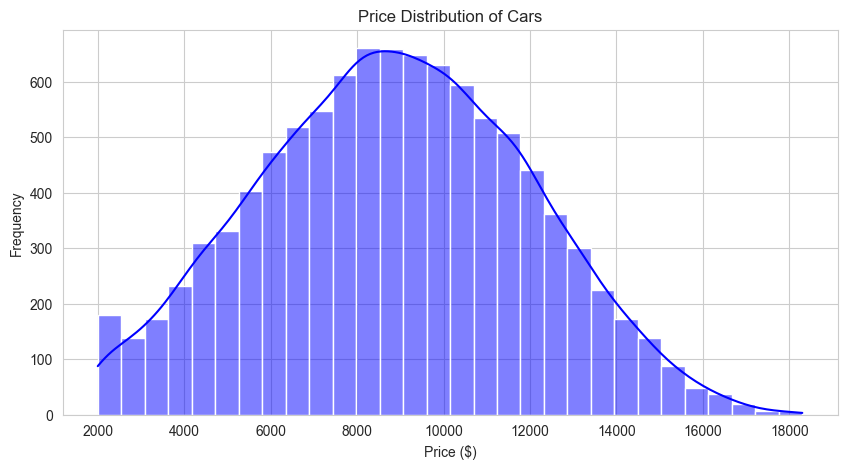

In [29]:
# Price Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["Price"], bins=30, kde=True, color="blue")
plt.title("Price Distribution of Cars")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()

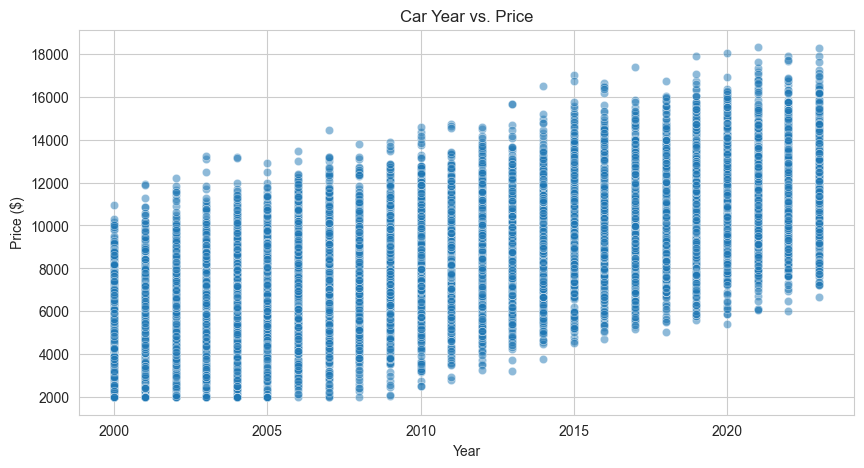

In [30]:
# Year vs. Price Scatter Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Year"], y=df["Price"], alpha=0.5)
plt.title("Car Year vs. Price")
plt.xlabel("Year")
plt.ylabel("Price ($)")
plt.show()

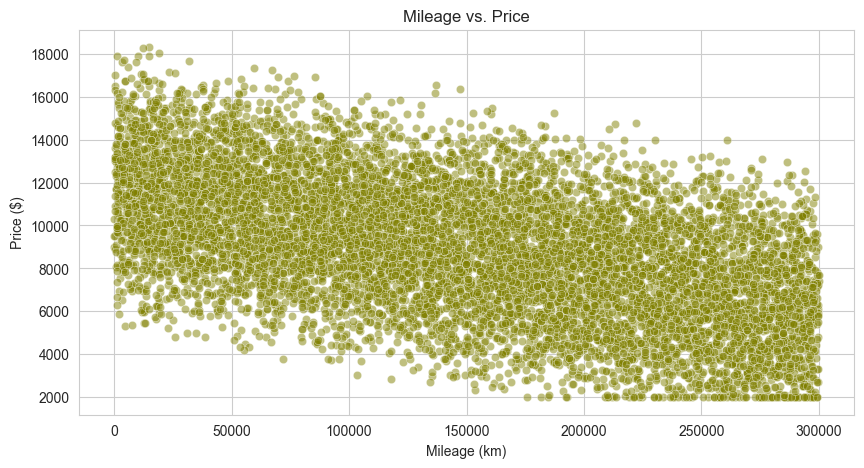

In [31]:
# Mileage vs. Price Scatter Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Mileage"], y=df["Price"], alpha=0.5, color="olive")
plt.title("Mileage vs. Price")
plt.xlabel("Mileage (km)")
plt.ylabel("Price ($)")
plt.show()

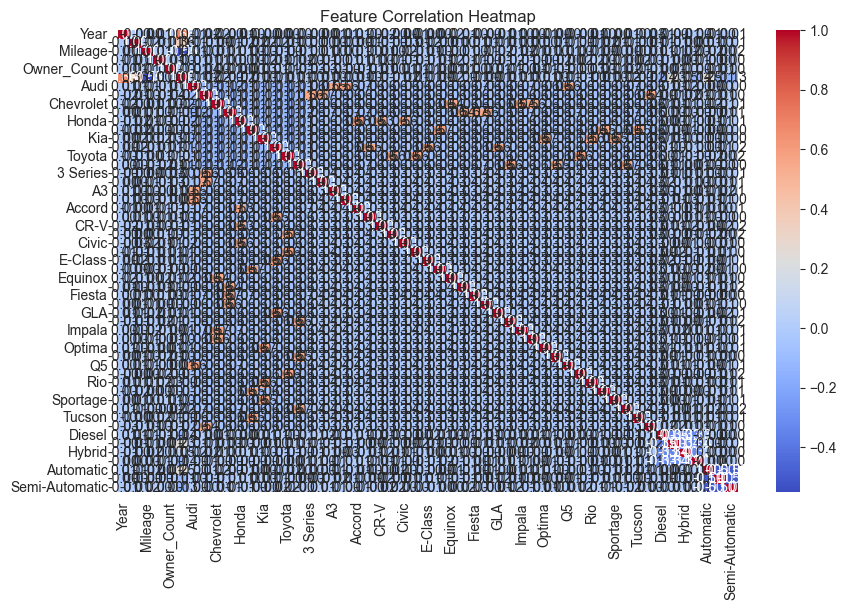

In [32]:
# Heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

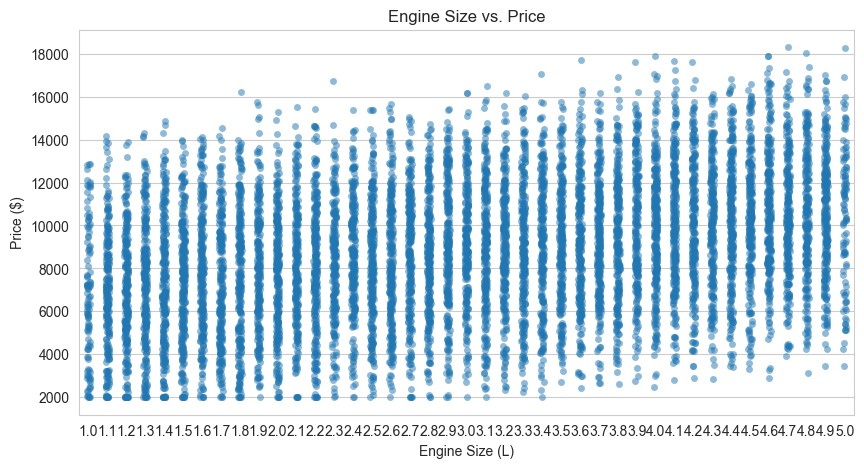

In [33]:
# Stripplot of Engine Size vs. Price
plt.figure(figsize=(10, 5))
sns.stripplot(x=df["Engine_Size"], y=df["Price"], jitter=True, alpha=0.5)
plt.title("Engine Size vs. Price")
plt.xlabel("Engine Size (L)")
plt.ylabel("Price ($)")
plt.show()

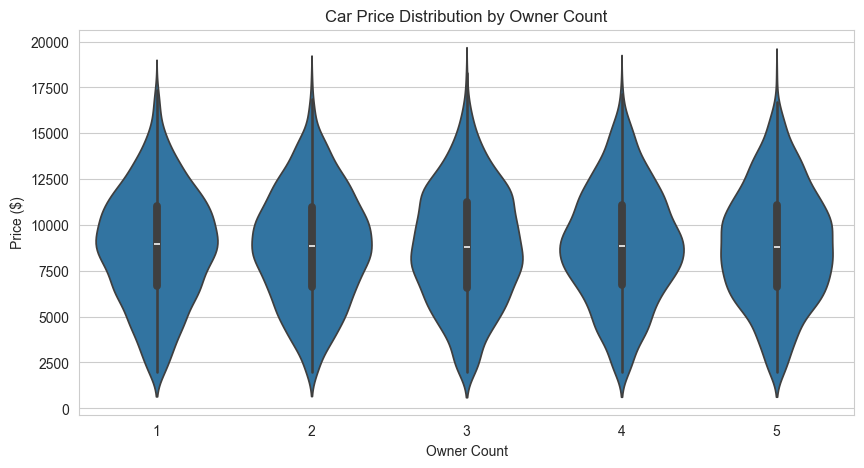

In [34]:
# Violin plot of Price by Owner Count
plt.figure(figsize=(10, 5))
sns.violinplot(x=df["Owner_Count"], y=df["Price"])
plt.title("Car Price Distribution by Owner Count")
plt.xlabel("Owner Count")
plt.ylabel("Price ($)")
plt.show()

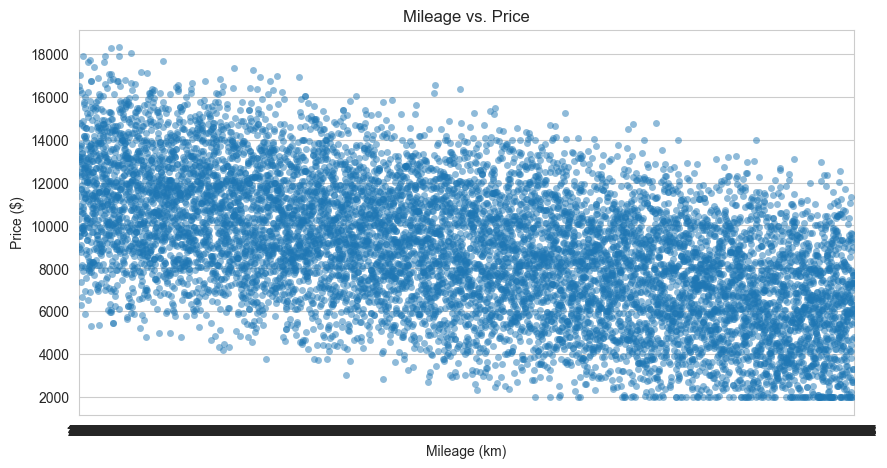

In [35]:
# Stripplot of Mileage vs. Price
plt.figure(figsize=(10, 5))
sns.stripplot(x=df["Mileage"], y=df["Price"], jitter=True, alpha=0.5)
plt.title("Mileage vs. Price")
plt.xlabel("Mileage (km)")
plt.ylabel("Price ($)")
plt.show()

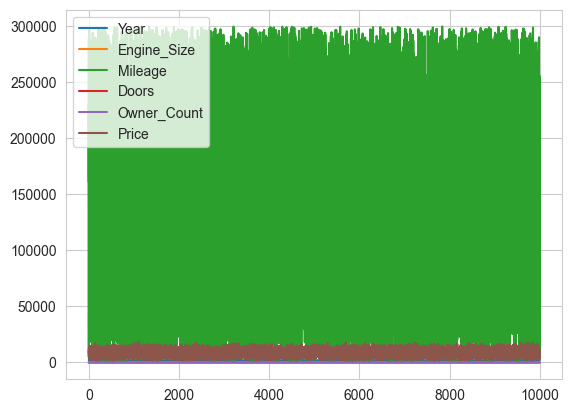

In [36]:
df.plot()
plt.show()

Text(0.5, 1.0, 'Yearly Trend in Car Listings')

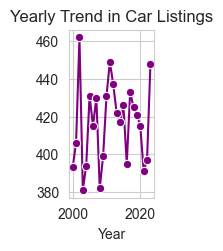

In [39]:
# 10. Yearly Trend in Car Listings
plt.subplot(2, 5, 10)
year_counts = df["Year"].value_counts().sort_index()
sns.lineplot(x=year_counts.index, y=year_counts.values, marker="o", color="purple")
plt.title("Yearly Trend in Car Listings")

C:\Users\Akhil\AppData\Local\Temp\ipykernel_28860\1595514925.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Owner_Count"], y=df["Price"], palette="coolwarm")


Text(0.5, 1.0, 'Price vs Owner Count')

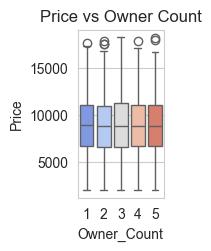

In [40]:
# 9. Price vs. Owner Count
plt.subplot(2, 5, 9)
sns.boxplot(x=df["Owner_Count"], y=df["Price"], palette="coolwarm")
plt.title("Price vs Owner Count")


##  Observations
Brand & Model Variety: The dataset includes multiple car brands and models, suggesting diversity in available options.

Age Impact: The dataset covers a range of manufacturing years, with both newer and older models. Older cars may have higher mileage and lower prices.

Fuel Type & Transmission: The dataset includes diesel, hybrid, and electric cars, along with manual, automatic, and semi-automatic transmissions, impacting price variations.

Mileage & Ownership: Higher mileage and multiple owners may negatively affect car prices.

Price Distribution: Prices vary significantly, influenced by factors such as brand reputation, condition, and features.

## Conclusion
This dataset provides valuable insights into used car pricing. By analyzing the relationships between factors such as brand, mileage, fuel type, and ownership history, we can predict price trends and make informed buying or selling decisions. Further statistical and machine learning analyses could help in developing a car price prediction model.